In [3]:
import pandas as pd
import nltk
tokens = nltk.word_tokenize(":)")
print(nltk.pos_tag(tokens))

pos = pd.DataFrame(pos_tag(tokens))
pos = " ".join(list(pos[pos[1].str.contains("JJ")].iloc[:,0])).split(" ")
l2 = ["i","you","me"]
pos = [x for x in pos if x not in l2]
pos

[(':', ':'), (')', ')')]


NameError: name 'pos_tag' is not defined

In [4]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [5]:
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk import pos_tag
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
import re
from contractions import contractions_dict
from string import punctuation
pd.set_option('display.max_colwidth', -1)

In [6]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Cell_Phones_and_Accessories_5.json.gz')

df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"08 4, 2014",A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,"Looks even better in person. Be careful to not drop your phone so often because the rhinestones will fall off (duh). More of a decorative case than it is protective, but I will say that it fits perfectly and securely on my phone. Overall, very pleased with this purchase.",Can't stop won't stop looking at it,1407110400,NaN,NaN
1,5.0,True,"02 12, 2014",A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy from!,1,1392163200,NaN,NaN
2,3.0,True,"02 8, 2014",AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I'm actually missing 2 studs but nothing too noticeable the studding is almost a bit sloppy around the bow, but once again not too noticeable. I haven't put in my phone yet so this is just what I've notice so far",Its okay,1391817600,NaN,NaN
3,2.0,True,"02 4, 2014",A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY WERE OKAY WITH IT. JUST NOT WHAT I EXPECTED.,CASE,1391472000,NaN,NaN
4,4.0,True,"02 3, 2014",A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs fall off easily and to protect a phone this would not be recommended. Buy if you just like it for looks.",Cute!,1391385600,NaN,NaN


In [7]:
df = df.dropna(subset = ['reviewText','summary'])
df.isna().sum()

overall           0      
verified          0      
reviewTime        0      
reviewerID        0      
asin              0      
style             522684 
reviewerName      133    
reviewText        0      
summary           0      
unixReviewTime    0      
vote              1035232
image             1100212
dtype: int64

In [8]:
df['overall'].value_counts()

5.0    706102
4.0    184293
3.0    98189 
1.0    81469 
2.0    57153 
Name: overall, dtype: int64

In [9]:
df_negative_reviews = df[df['overall']<3].iloc[:100000]
df_positive_reviews = df[df['overall']>3].iloc[:200000]

In [40]:
df_new = df.iloc[:100]
df_new.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"08 4, 2014",A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,"Looks even better in person. Be careful to not drop your phone so often because the rhinestones will fall off (duh). More of a decorative case than it is protective, but I will say that it fits perfectly and securely on my phone. Overall, very pleased with this purchase.",Can't stop won't stop looking at it,1407110400,NaN,NaN
1,5.0,True,"02 12, 2014",A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy from!,1,1392163200,NaN,NaN
2,3.0,True,"02 8, 2014",AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I'm actually missing 2 studs but nothing too noticeable the studding is almost a bit sloppy around the bow, but once again not too noticeable. I haven't put in my phone yet so this is just what I've notice so far",Its okay,1391817600,NaN,NaN
3,2.0,True,"02 4, 2014",A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY WERE OKAY WITH IT. JUST NOT WHAT I EXPECTED.,CASE,1391472000,NaN,NaN
4,4.0,True,"02 3, 2014",A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs fall off easily and to protect a phone this would not be recommended. Buy if you just like it for looks.",Cute!,1391385600,NaN,NaN


In [11]:
def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text



def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)
# text = "Hello! how are you doing?"
# print (strip_punctuation(text))

# def main():
#     text = """I ain't going there. You'll have to go alone."""
    
#     text=expand_contractions(text,contractions_dict)
# #     sentences = nltk.sent_tokenize(text)
# #     tokenized_sentences = nltk.word_tokenize(text)
    
#     print (text)


# if __name__ == '__main__':
#     main()

In [12]:
from nltk.tokenize import RegexpTokenizer
def cleanme(txt):
    sent = txt.lower()
    sent_expanded_contractions = expand_contractions(sent,contractions_dict)
    sent_expanded_contractions = re.sub(r'(?<=[.,])(?=[^\s])', r' ', sent_expanded_contractions)
    sent_without_punct = strip_punctuation(sent_expanded_contractions)
#     transformed = re.sub(r'\b(?:not|never|no)\b[\w\s]+[^\w\s]', 
#        lambda match: re.sub(r'(\s+)(\w+)', r'\1not_\2', match.group(0)), 
#        sent_expanded_contractions,
#        flags=re.IGNORECASE)
#     sent_without_punct = "".join(c for c in transformed if c not in ('!','.',':','?'))
    
    TOKENIZER = RegexpTokenizer('(?u)\W+|\$[\d\.]+|\S+')
#     wrds = TOKENIZER.tokenize(sent_without_punct)
    wrds = word_tokenize(sent_without_punct)
    to_remove = ['no', 'not']
    new_stopwords = set(stopwords.words('english')).difference(to_remove)
    clwrds = [w for w in wrds if not w in new_stopwords]
    ln = len(clwrds)
    if ln>0:
        pos = pd.DataFrame(pos_tag(wrds))
        pos = (" ".join(list(pos[pos[1].str.contains("JJ")].iloc[:,0]))).split(" ")
        l2 = ["i","you","me"]
        pos = [x for x in pos if x not in l2]
    else:
        pos = [""]
    rt = [ln, " ".join(clwrds), " ".join(pos)]
    return(rt)

In [13]:
df_positive_reviews.iloc[4308]
cleanme(df_positive_reviews.iloc[2,:]['reviewText'])

[13,
 'liked cute studs fall easily protect phone would not recommended buy like looks',
 'cute studs']

In [14]:
tmp = list()
for i in range(5):
    tmp.append(cleanme(df.iloc[i,:]['reviewText']))
tmp = pd.DataFrame(tmp)
tmp.columns = ['reviewlen', 'cleanrev', 'adjreview']

print(tmp.head())

   reviewlen  \
0  23          
1  11          
2  25          
3  7           
4  13          

                                                                                                                                                           cleanrev  \
0  looks even better person careful not drop phone often rhinestones fall duh decorative case protective say fits perfectly securely phone overall pleased purchase   
1  not want spend whole lot cash want great deal shop buy                                                                                                             
2  case came time love design actually missing 2 studs nothing noticeable studding almost bit sloppy around bow not noticeable not put phone yet notice far           
3  not care gave gift okay not expected                                                                                                                               
4  liked cute studs fall easily protect phone would not recommended 

In [15]:
tmp = list()
for i in range(100000):
    tmp.append(cleanme(df_negative_reviews.iloc[i,:]['reviewText']))
tmp = pd.DataFrame(tmp)
tmp.columns = ['reviewlen', 'cleanrev', 'adjreview']

(tmp.head())


df_negative_reviews_new = df_negative_reviews.reset_index()
# df_negative_reviews_new.drop(['reviewlen', 'cleanrev', 'adjreview'], axis=1, inplace=True)
df_negative_reviews_new = pd.concat([df_negative_reviews_new,tmp], axis=1)
df_negative_reviews_new = df_negative_reviews_new[['overall','reviewText','summary','reviewlen', 'cleanrev', 'adjreview']]
df_negative_reviews_new.head()

,overall,reviewText,summary,reviewlen,cleanrev,adjreview
0,2.0,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY WERE OKAY WITH IT. JUST NOT WHAT I EXPECTED.,CASE,7,not care gave gift okay not expected,
1,2.0,The product looked exactly like the picture and it was very nice. However only days later it fell apart. I'm very disappointed with the quality of the product.,Not so happy,14,product looked exactly like picture nice however days later fell apart disappointed quality product,nice disappointed
2,1.0,DO NOT BUY! this item is seriously cheap as heck. not worth buying it at all. I didn't even get to use it and it was already losing all of its gems. I wish I got my money back on this item!!,WORST ITEM!,21,not buy item seriously cheap heck not worth buying not even get use already losing gems wish got money back item,cheap worth wish
3,1.0,Very cheap broke the first time we put it on :( It was pretty but very cheaply made!! Too bad as it is cute,cheap plastic,10,cheap broke first time put pretty cheaply made bad cute,cheap first bad cute
4,2.0,"I used this case for not even a week and the bow came off. I loved it so pretty, but wish it would of stayed together.",....,13,used case not even week bow came loved pretty wish would stayed together,wish


In [16]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

wordnet_lemmatizer = WordNetLemmatizer()
snowball_stemmer = SnowballStemmer('english')

txt = df_negative_reviews_new.cleanrev.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in words]
# stemmed_word = [snowball_stemmer.stem(word) for word in words]
bgs = nltk.trigrams(lemmatized_word)

#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(bgs)
fdist.most_common(40)

# word_dist = nltk.FreqDist(stemmed_word)
# print(word_dist)
# word_dist.most_common(20)

[(('would', 'not', 'recommend'), 1893),
 (('not', 'waste', 'money'), 1154),
 (('not', 'fit', 'phone'), 1047),
 (('screen', 'protector', 'not'), 959),
 (('could', 'not', 'get'), 779),
 (('iphone', '6', 'plus'), 767),
 (('case', 'not', 'fit'), 733),
 (('would', 'not', 'buy'), 715),
 (('glass', 'screen', 'protector'), 691),
 (('not', 'last', 'long'), 603),
 (('not', 'work', 'well'), 585),
 (('not', 'recommend', 'product'), 579),
 (('not', 'work', 'not'), 491),
 (('not', 'worth', 'money'), 476),
 (('not', 'fit', 'well'), 461),
 (('not', 'charge', 'phone'), 449),
 (('not', 'hold', 'charge'), 441),
 (('waste', 'money', 'not'), 400),
 (('phone', 'would', 'not'), 399),
 (('would', 'not', 'charge'), 372),
 (('not', 'recommend', 'case'), 369),
 (('not', 'protect', 'phone'), 369),
 (('would', 'not', 'stay'), 367),
 (('not', 'fit', 'iphone'), 331),
 (('not', 'buy', 'not'), 327),
 (('would', 'not', 'work'), 321),
 (('not', 'waste', 'time'), 319),
 (('phone', 'not', 'work'), 307),
 (('not', 'recomme

In [17]:
d = {}
for key, value in fdist.items() :
#     print ("_".join(key), value)
    d["_".join(key)] = value

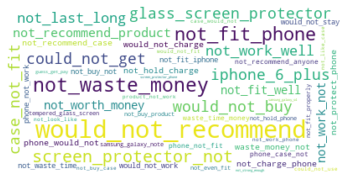

In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
WC_height = 200
WC_width = 400
WC_max_words = 50
wordcloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, background_color="white")
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("WordCloud_Bigrams_frequent_words.png")

In [24]:
tmp = list()
for i in range(150000):
    tmp.append(cleanme(df_positive_reviews.iloc[i,:]['reviewText']))
tmp = pd.DataFrame(tmp)
tmp.columns = ['reviewlen', 'cleanrev', 'adjreview']

(tmp.head())


df_positive_reviews_new = df_positive_reviews.reset_index()
# df_negative_reviews_new.drop(['reviewlen', 'cleanrev', 'adjreview'], axis=1, inplace=True)
df_positive_reviews_new = pd.concat([df_positive_reviews_new,tmp], axis=1)
df_positive_reviews_new = df_positive_reviews_new[['overall','reviewText','summary','reviewlen', 'cleanrev', 'adjreview']]
df_positive_reviews_new.head()

,overall,reviewText,summary,reviewlen,cleanrev,adjreview
0,5.0,"Looks even better in person. Be careful to not drop your phone so often because the rhinestones will fall off (duh). More of a decorative case than it is protective, but I will say that it fits perfectly and securely on my phone. Overall, very pleased with this purchase.",Can't stop won't stop looking at it,23.0,looks even better person careful not drop phone often rhinestones fall duh decorative case protective say fits perfectly securely phone overall pleased purchase,careful more decorative protective overall pleased
1,5.0,When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy from!,1,11.0,not want spend whole lot cash want great deal shop buy,whole great
2,4.0,"I liked it because it was cute, but the studs fall off easily and to protect a phone this would not be recommended. Buy if you just like it for looks.",Cute!,13.0,liked cute studs fall easily protect phone would not recommended buy like looks,cute studs
3,5.0,"It is a very cute case. None of the jewels have fallen off and the bow is glued on very well. Came in the time frame that was given and I'm happy with this purchase. The only thing you might want to know is, I carry my phone in my jeans and it does fit very tightly because it is a big bow. You have to be careful but worth it.",Cute case,27.0,cute case none jewels fallen bow glued well came time frame given happy purchase thing might want know carry phone jeans fit tightly big bow careful worth,cute happy only fit big careful worth
4,4.0,"I really love this case... you have to keep your phone face down all the time, but it's pretty good quality. Some stones come off from normal use, unless you keep it in your purse all day.",Pretty Cute!,18.0,really love case keep phone face time pretty good quality stones come normal use unless keep purse day,good normal


In [25]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

wordnet_lemmatizer = WordNetLemmatizer()
snowball_stemmer = SnowballStemmer('english')

txt = df_positive_reviews_new.cleanrev.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in words]
# stemmed_word = [snowball_stemmer.stem(word) for word in words]

bgs = nltk.trigrams(lemmatized_word)

#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(bgs)
fdist.most_common(30)
# for k,v in fdist.items():
#     print (k,v)
    
# word_dist = nltk.FreqDist(lemmatized_word)
# print(word_dist)
# word_dist.most_common(20)

[(('would', 'highly', 'recommend'), 679),
 (('fit', 'phone', 'perfectly'), 662),
 (('would', 'recommend', 'anyone'), 655),
 (('would', 'definitely', 'recommend'), 632),
 (('screen', 'protector', 'not'), 590),
 (('not', 'go', 'wrong'), 560),
 (('typehidden', 'name', 'valuehttpsimagesna'), 536),
 (('name', 'valuehttpsimagesna', 'sslimagesamazon'), 536),
 (('fit', 'like', 'glove'), 522),
 (('samsung', 'galaxy', 's3'), 474),
 (('not', 'big', 'deal'), 464),
 (('not', 'beat', 'price'), 451),
 (('not', 'add', 'much'), 442),
 (('galaxy', 'note', '2'), 434),
 (('give', '5', 'star'), 432),
 (('last', 'long', 'time'), 428),
 (('would', 'recommend', 'product'), 420),
 (('really', 'like', 'case'), 411),
 (('highly', 'recommend', 'product'), 406),
 (('case', 'fit', 'perfectly'), 403),
 (('protects', 'phone', 'well'), 403),
 (('case', 'fit', 'phone'), 392),
 (('case', 'iphone', '5'), 383),
 (('samsung', 'galaxy', 'note'), 379),
 (('great', 'product', 'great'), 377),
 (('thing', 'not', 'like'), 368),


In [26]:
d = {}
for key, value in fdist.items() :
#     print ("_".join(key), value)
    d["_".join(key)] = value

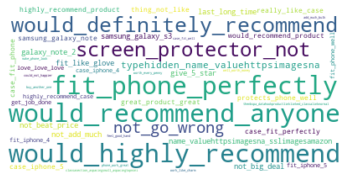

In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
WC_height = 200
WC_width = 400
WC_max_words = 50
wordcloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, background_color="white")
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("WordCloud_Positive_Reviews.png")

In [48]:
df_new = df.iloc[:100]

tmp = list()
for i in range(100):
    tmp.append(cleanme(df_new.iloc[i,:]['reviewText']))
tmp = pd.DataFrame(tmp)
tmp.columns = ['reviewlen', 'cleanrev', 'adjreview']

(tmp.head())


df_new = df_new.reset_index()
# df_negative_reviews_new.drop(['reviewlen', 'cleanrev', 'adjreview'], axis=1, inplace=True)
df_new = pd.concat([df_new,tmp], axis=1)
df_new = df_new[['overall','reviewText','summary','reviewlen', 'cleanrev', 'adjreview']]
df_new.head()

,overall,reviewText,summary,reviewlen,cleanrev,adjreview
0,5.0,"Looks even better in person. Be careful to not drop your phone so often because the rhinestones will fall off (duh). More of a decorative case than it is protective, but I will say that it fits perfectly and securely on my phone. Overall, very pleased with this purchase.",Can't stop won't stop looking at it,23,looks even better person careful not drop phone often rhinestones fall duh decorative case protective say fits perfectly securely phone overall pleased purchase,careful more decorative protective overall pleased
1,5.0,When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy from!,1,11,not want spend whole lot cash want great deal shop buy,whole great
2,3.0,"so the case came on time, i love the design. I'm actually missing 2 studs but nothing too noticeable the studding is almost a bit sloppy around the bow, but once again not too noticeable. I haven't put in my phone yet so this is just what I've notice so far",Its okay,25,case came time love design actually missing 2 studs nothing noticeable studding almost bit sloppy around bow not noticeable not put phone yet notice far,noticeable sloppy noticeable
3,2.0,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY WERE OKAY WITH IT. JUST NOT WHAT I EXPECTED.,CASE,7,not care gave gift okay not expected,
4,4.0,"I liked it because it was cute, but the studs fall off easily and to protect a phone this would not be recommended. Buy if you just like it for looks.",Cute!,13,liked cute studs fall easily protect phone would not recommended buy like looks,cute studs


In [42]:
df_new.columns = ['overall','reviewText','summary','cleanReviewLength', 'cleanReview', 'adjectives']
df_new.head()

,overall,reviewText,summary,cleanReviewLength,cleanReview,adjectives
0,5.0,"Looks even better in person. Be careful to not drop your phone so often because the rhinestones will fall off (duh). More of a decorative case than it is protective, but I will say that it fits perfectly and securely on my phone. Overall, very pleased with this purchase.",Can't stop won't stop looking at it,23,looks even better person careful not drop phone often rhinestones fall duh decorative case protective say fits perfectly securely phone overall pleased purchase,careful more decorative protective overall pleased
1,5.0,When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy from!,1,11,not want spend whole lot cash want great deal shop buy,whole great
2,3.0,"so the case came on time, i love the design. I'm actually missing 2 studs but nothing too noticeable the studding is almost a bit sloppy around the bow, but once again not too noticeable. I haven't put in my phone yet so this is just what I've notice so far",Its okay,25,case came time love design actually missing 2 studs nothing noticeable studding almost bit sloppy around bow not noticeable not put phone yet notice far,noticeable sloppy noticeable
3,2.0,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY WERE OKAY WITH IT. JUST NOT WHAT I EXPECTED.,CASE,7,not care gave gift okay not expected,
4,4.0,"I liked it because it was cute, but the studs fall off easily and to protect a phone this would not be recommended. Buy if you just like it for looks.",Cute!,13,liked cute studs fall easily protect phone would not recommended buy like looks,cute studs


In [47]:
from textblob import TextBlob, Word
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity

df_new['polarity'] = df_new.reviewText.apply(detect_polarity)
df_new[1:10]

,overall,reviewText,summary,cleanReviewLength,cleanReview,adjectives,polarity
1,5.0,When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy from!,1,11,not want spend whole lot cash want great deal shop buy,whole great,0.600000
2,3.0,"so the case came on time, i love the design. I'm actually missing 2 studs but nothing too noticeable the studding is almost a bit sloppy around the bow, but once again not too noticeable. I haven't put in my phone yet so this is just what I've notice so far",Its okay,25,case came time love design actually missing 2 studs nothing noticeable studding almost bit sloppy around bow not noticeable not put phone yet notice far,noticeable sloppy noticeable,-0.004167
3,2.0,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY WERE OKAY WITH IT. JUST NOT WHAT I EXPECTED.,CASE,7,not care gave gift okay not expected,,0.200000
4,4.0,"I liked it because it was cute, but the studs fall off easily and to protect a phone this would not be recommended. Buy if you just like it for looks.",Cute!,13,liked cute studs fall easily protect phone would not recommended buy like looks,cute studs,0.511111
5,2.0,The product looked exactly like the picture and it was very nice. However only days later it fell apart. I'm very disappointed with the quality of the product.,Not so happy,14,product looked exactly like picture nice however days later fell apart disappointed quality product,nice disappointed,0.011000
6,3.0,I FINALLY got my case today. It took forever to get here! It's cute and looks just like the pic. Like right after I wrote this review some of the rhinestones started falling off. The package does come with glue to glue them back on but in my opinion this case is only good for a couple of days (if that.) I wouldn't purchase another. Thanks you,It's cute!,33,finally got case today took forever get cute looks like pic like right wrote review rhinestones started falling package come glue glue back opinion case good couple days would not purchase another thanks,cute good,0.240816
7,5.0,"It is a very cute case. None of the jewels have fallen off and the bow is glued on very well. Came in the time frame that was given and I'm happy with this purchase. The only thing you might want to know is, I carry my phone in my jeans and it does fit very tightly because it is a big bow. You have to be careful but worth it.",Cute case,27,cute case none jewels fallen bow glued well came time frame given happy purchase thing might want know carry phone jeans fit tightly big bow careful worth,cute happy only fit big careful worth,0.224206
8,1.0,DO NOT BUY! this item is seriously cheap as heck. not worth buying it at all. I didn't even get to use it and it was already losing all of its gems. I wish I got my money back on this item!!,WORST ITEM!,21,not buy item seriously cheap heck not worth buying not even get use already losing gems wish got money back item,cheap worth wish,0.083333
9,4.0,"I really love this case... you have to keep your phone face down all the time, but it's pretty good quality. Some stones come off from normal use, unless you keep it in your purse all day.",Pretty Cute!,18,really love case keep phone face time pretty good quality stones come normal use unless keep purse day,good normal,0.288889


In [ ]:
txt = df_positive_reviews_new.adjreview.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)
print(word_dist)
word_dist.most_common(20)